## EM algorithm to solve Mixture of Gaussian

In [28]:
import numpy as np
import matplotlib.pyplot as plt

[[ 0.01501703 -1.96645385]
 [ 5.26279743  2.78817091]
 [ 7.80861827  5.11821458]
 ...
 [-6.28980122 -5.54954711]
 [-0.6126305   0.02192317]
 [-8.2015517  -5.49554098]]


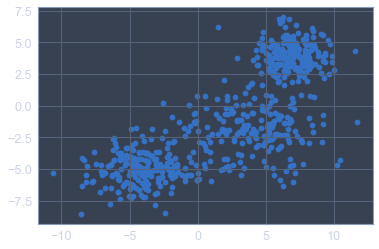

In [52]:
# create some fake data
Gaussion_nums=3
data_nums=Gaussion_nums*200
test_mean=[[7,4],[-4,-5],[4,-2]]
test_cov=[[[2,0],[0,1]],[[3,0],[0,2]],[[7,0],[0,4]]]
X1=np.random.multivariate_normal(mean=test_mean[0],cov=test_cov[0],size=200)
X2=np.random.multivariate_normal(mean=test_mean[1],cov=test_cov[1],size=200)
X3=np.random.multivariate_normal(mean=test_mean[2],cov=test_cov[2],size=200)
X=np.r_[X1,X2,X3]
np.random.shuffle(X)
print(X)
plt.scatter(X[:,0],X[:,1])

In [53]:
# initialize the parameters for three Gaussians
mu=np.random.randn(3,2)
sigma=[np.eye(2,2) for i in range(3)]
phi=np.random.rand(3)
print(mu)
print(sigma)
print(phi)


[[ 1.4299562   1.87520843]
 [-0.44817686  0.98836333]
 [ 0.26589353  1.51867961]]
[array([[1., 0.],
       [0., 1.]]), array([[1., 0.],
       [0., 1.]]), array([[1., 0.],
       [0., 1.]])]
[0.4220036  0.84150093 0.92263666]


In [54]:
# compute p(x_i|z_i=j)
def condi_Gaussian(x,z):
    m=mu[z]
    sig=sigma[z]
    sig_inv=np.linalg.inv(sig)
    return np.exp(-0.5*(x-m)@sig_inv@(x-m))/np.linalg.det(sig)

In [55]:
# EM iteration
W=np.zeros((data_nums,Gaussion_nums))
loss=0
old_loss=0
for s in range(100):
    # E-step
    loss=0
    for i in range(data_nums):
        tmp=np.zeros(Gaussion_nums)
        for j in range(Gaussion_nums):
            tmp[j]=condi_Gaussian(X[i],j)*phi[j]
        normalization=np.sum(tmp)
        for j in range(Gaussion_nums):
            W[i][j]=tmp[j]/normalization
            loss+=(W[i][j]*np.log(tmp[j]/W[i][j]))
    print(f"step {s}, loss={loss:.5f}")
    if abs(old_loss-loss)<1e-3:
        break
    old_loss=loss
    # M-step
    for j in range(Gaussion_nums):
        phi[j]=np.sum(W[:,j])/data_nums
        sig_tmp=np.zeros((2,2))
        mu_tmp=np.zeros((2,))
        for i in range(data_nums):
            mu_tmp+=W[i,j]*X[i]
            sig_tmp+=W[i,j]*(X[i]-mu[j])[:,np.newaxis]@(X[i]-mu[j][np.newaxis,:])
        mu[j]=mu_tmp/(phi[j]*data_nums)
        sigma[j]=sig_tmp/(phi[j]*data_nums)
    

step 0, loss=-12683.83720
step 1, loss=-3945.26756
step 2, loss=-3090.45931
step 3, loss=-2848.59902
step 4, loss=-2769.13439
step 5, loss=-2725.38915
step 6, loss=-2682.83000
step 7, loss=-2638.12836
step 8, loss=-2593.73131
step 9, loss=-2552.54702
step 10, loss=-2516.40599
step 11, loss=-2486.13103
step 12, loss=-2462.52494
step 13, loss=-2446.11136
step 14, loss=-2435.91855
step 15, loss=-2430.00561
step 16, loss=-2426.67257
step 17, loss=-2424.81086
step 18, loss=-2423.77250
step 19, loss=-2423.19303
step 20, loss=-2422.86972
step 21, loss=-2422.68978
step 22, loss=-2422.59019
step 23, loss=-2422.53561
step 24, loss=-2422.50615
step 25, loss=-2422.49061
step 26, loss=-2422.48272
step 27, loss=-2422.47894
step 28, loss=-2422.47732
step 29, loss=-2422.47679


In [56]:
print(test_mean)
print(mu)
print(test_cov)
print(sigma)

[[7, 4], [-4, -5], [4, -2]]
[[ 6.89263494  3.87541387]
 [-3.79494432 -4.90925045]
 [ 4.27670931 -1.92711354]]
[[[2, 0], [0, 1]], [[3, 0], [0, 2]], [[7, 0], [0, 4]]]
[array([[2.12271919, 0.01537255],
       [0.01537255, 1.50088058]]), array([[5.26666163, 0.4499918 ],
       [0.4499918 , 1.69574572]]), array([[ 6.5063268 , -0.90276312],
       [-0.90276312,  2.77246074]])]


In [57]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3,covariance_type='full', random_state=0)
gmm.fit(X)


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [58]:
print(gmm.means_)
print(gmm.covariances_)

[[ 6.92629599  3.96447159]
 [-3.99933948 -4.97301208]
 [ 4.12592937 -1.90374852]]
[[[ 2.06047734 -0.0538924 ]
  [-0.0538924   1.27515566]]

 [[ 4.47676309  0.24102403]
  [ 0.24102403  1.59594964]]

 [[ 7.0414659  -0.37232227]
  [-0.37232227  3.16852078]]]
